In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline

df1 = pd.read_csv("../../data/safe_sim.csv")
df2 = pd.read_csv("../../data/risky_sim.csv")

df = pd.merge(df1, df2, on=['Year', 'Team'], how='outer')

del df["Unnamed: 0_x"]
del df["Unnamed: 0_y"]

df["Proj_Wins"] = 0.25 * df["Proj_Wins_Safe"] + 0.75 * df["Proj_Wins_Risky"]

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024, 2025]

df['Sim_Wins'] = [-1 for _ in range(len(df))]

In [5]:
def same_seed(df, seed, r):
    
    subdf = pd.DataFrame(df[df["Seed"] == seed])
    team1 = subdf.head(1)
    team1index = team1["Team"].index
    team2 = subdf.tail(1)
    team2index = team2["Team"].index

    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = r

    else:
        df.loc[team1index, "Sim_Wins"] = r
        
    return df

def round64(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    seeds1 = [1,2,3,4,5,6,7,8]
    seeds2 = [16,15,14,13,12,11,10,9]
    
    for i in range(0,8):
        
        rdf = subdf[(subdf["Seed"] == seeds1[i]) | (subdf["Seed"] == seeds2[i])]
        team1 = rdf.head(1)
        team1index = team1["Team"].index
        team2 = rdf.tail(1)
        team2index = team2["Team"].index
        
        if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
            df.loc[team2index, "Sim_Wins"] = 0
            
        else:
            df.loc[team1index, "Sim_Wins"] = 0
            
    return df

def round32(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    team1 = subdf[(subdf["Seed"] == 1) | (subdf["Seed"] == 16)]
    team1index = team1["Team"].index
    team2 = subdf[(subdf["Seed"] == 8) | (subdf["Seed"] == 9)]
    team2index = team2["Team"].index
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 1
    else:
        df.loc[team1index, "Sim_Wins"] = 1
    
    team3 = subdf[(subdf["Seed"] == 5) | (subdf["Seed"] == 12)]
    team3index = team3["Team"].index
    team4 = subdf[(subdf["Seed"] == 4) | (subdf["Seed"] == 13)]
    team4index = team4["Team"].index
    if team3["Proj_Wins"].iloc[0] > team4["Proj_Wins"].iloc[0]:
        df.loc[team4index, "Sim_Wins"] = 1
    else:
        df.loc[team3index, "Sim_Wins"] = 1
    
    team5 = subdf[(subdf["Seed"] == 6) | (subdf["Seed"] == 11)]
    team5index = team5["Team"].index
    team6 = subdf[(subdf["Seed"] == 3) | (subdf["Seed"] == 14)]
    team6index = team6["Team"].index
    if team5["Proj_Wins"].iloc[0] > team6["Proj_Wins"].iloc[0]:
        df.loc[team6index, "Sim_Wins"] = 1
    else:
        df.loc[team5index, "Sim_Wins"] = 1
    
    team7 = subdf[(subdf["Seed"] == 7) | (subdf["Seed"] == 10)]
    team7index = team7["Team"].index
    team8 = subdf[(subdf["Seed"] == 2) | (subdf["Seed"] == 15)]
    team8index = team8["Team"].index
    if team7["Proj_Wins"].iloc[0] > team8["Proj_Wins"].iloc[0]:
        df.loc[team8index, "Sim_Wins"] = 1
    else:
        df.loc[team7index, "Sim_Wins"] = 1
        
    return df

def sweet16(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    options1 = [1,8,9,16]
    for i in options1:
        if not subdf[subdf["Seed"] == i].empty:
            team1 = subdf[subdf["Seed"] == i]
            break
    team1index = team1["Team"].index
    options2 = [4,5,12,13]
    for i in options2:
        if not subdf[subdf["Seed"] == i].empty:
            team2 = subdf[subdf["Seed"] == i]
            break
    team2index = team2["Team"].index
        
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 2
    else:
        df.loc[team1index, "Sim_Wins"] = 2
        
    options3 = [3,6,11,14]
    for i in options3:
        if not subdf[subdf["Seed"] == i].empty:
            team3 = subdf[subdf["Seed"] == i]
            break 
    team3index = team3["Team"].index
    options4 = [2,7,10,15]
    for i in options4:
        if not subdf[subdf["Seed"] == i].empty:
            team4 = subdf[subdf["Seed"] == i]
            break
    team4index = team4["Team"].index
        
    if team3["Proj_Wins"].iloc[0] > team4["Proj_Wins"].iloc[0]:
        df.loc[team4index, "Sim_Wins"] = 2
    else:
        df.loc[team3index, "Sim_Wins"] = 2
        
    return df

def elite8(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    options1 = [1,4,5,8,9,12,13,16]
    for i in options1:
        if not subdf[subdf["Seed"] == i].empty:
            team1 = subdf[subdf["Seed"] == i]
            break
    team1index = team1["Team"].index
    
    options2 = [2,3,6,7,10,11,14,15]
    for i in options2:
        if not subdf[subdf["Seed"] == i].empty:
            team2 = subdf[subdf["Seed"] == i]
            break
    team2index = team2["Team"].index
    
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 3
    else:
        df.loc[team1index, "Sim_Wins"] = 3
        
    return df

def region_simulation(data, year, region):
    
    seeds = list(range(1,17))
    
    df = data[(data["Year"] == year) & (data["Region"] == region)]
    ###########################################################################
    # FIRST FOUR
    r = 0
    
    for seed in seeds:
    
        if df[df["Seed"] == seed].shape[0] != 1:
            
            df = same_seed(df, seed, r)
    ##########################################################################
    ##########################################################################
    # FIRST ROUND (R64)
        
    df = round64(df)
    
    ##########################################################################
    ##########################################################################
    # SECOND ROUND (R32)
    
    df = round32(df)
    
    ##########################################################################
    ##########################################################################
    # SWEET 16
    
    df = sweet16(df)
    
    ##########################################################################
    ##########################################################################
    # ELITE 8
    
    df = elite8(df)
    
    return df

def final4(df, year):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    quads = pd.read_csv("../../data/quadrants.csv")
    quads = quads[quads["Year"] == year]
    
    if quads["East"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 1:
        team1 = subdf[subdf["Region"] == "Midwest"]
    team1index = team1["Team"].index
        
    if quads["East"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 2:
        team2 = subdf[subdf["Region"] == "Midwest"]
    team2index = team2["Team"].index
        
    if quads["East"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 3:
        team3 = subdf[subdf["Region"] == "Midwest"]
    team3index = team3["Team"].index
        
    if quads["East"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "East"]
    elif quads["West"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "West"]
    elif quads["South"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "South"]
    elif quads["Midwest"].iloc[0] == 4:
        team4 = subdf[subdf["Region"] == "Midwest"]
    team4index = team4["Team"].index
        
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 4
    else:
        df.loc[team1index, "Sim_Wins"] = 4
     
    if team3["Proj_Wins"].iloc[0] > team4["Proj_Wins"].iloc[0]:
        df.loc[team4index, "Sim_Wins"] = 4
    else:
        df.loc[team3index, "Sim_Wins"] = 4
        
    return df

def championship(df):
    
    subdf = df[df["Sim_Wins"] == -1]
    
    team1 = subdf.head(1)
    team1index = team1["Team"].index
    team2 = subdf.tail(1)
    team2index = team2["Team"].index
    
    if team1["Proj_Wins"].iloc[0] > team2["Proj_Wins"].iloc[0]:
        df.loc[team2index, "Sim_Wins"] = 5
        df.loc[team1index, "Sim_Wins"] = 6
    else:
        df.loc[team1index, "Sim_Wins"] = 5
        df.loc[team2index, "Sim_Wins"] = 6
        
    return df

def bracket_simulation(data, year):
    
    df1 = region_simulation(data, year, "West")
    df2 = region_simulation(data, year, "East")
    df3 = region_simulation(data, year, "South")
    df4 = region_simulation(data, year, "Midwest")
    
    df = pd.concat([df1, df2, df3, df4])
    
    df = final4(df, year)
    
    df = championship(df)
                            
    return df

dfs = []

for year in years:
    
    dfs.append(bracket_simulation(df, year))
    
sim_df = pd.concat(dfs)
sim_df = sim_df[["Year", "Team", "Seed", "Region", "Proj_Wins", "Wins", "Sim_Wins"]]
df = sim_df.sort_values(["Year", "Wins", "Sim_Wins"], ascending=False)

def bracket_check(df, years):  
    
    scores = []

    for year in years:

        score = 0

        score = score + (10 * (len(df[(df["Year"] == year) & (df["Wins"] > 0) & (df["Sim_Wins"] > 0)])))
        score = score + (20 * (len(df[(df["Year"] == year) & (df["Wins"] > 1) & (df["Sim_Wins"] > 1)])))
        score = score + (40 * (len(df[(df["Year"] == year) & (df["Wins"] > 2) & (df["Sim_Wins"] > 2)])))
        score = score + (80 * (len(df[(df["Year"] == year) & (df["Wins"] > 3) & (df["Sim_Wins"] > 3)])))
        score = score + (160 * (len(df[(df["Year"] == year) & (df["Wins"] > 4) & (df["Sim_Wins"] > 4)])))
        score = score + (320 * (len(df[(df["Year"] == year) & (df["Wins"] > 5) & (df["Sim_Wins"] > 5)])))

        scores.append(score)

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, scores, color='g', label='Score')

    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.xticks(x, years)
    for i, score in enumerate(scores):
               plt.text(i, score, str(score), ha='center', va='bottom') 

    plt.show()
    
    df["Diff"] = abs(df["Wins"] - df["Sim_Wins"])
    
    avg = sum(scores) / len(scores)
    avgdiff = sum(df["Diff"]) / len(df["Diff"])

    print("Average:", round(avg, 3))
    print("Avg. Differential:", round(avgdiff, 3))
    
    
    df_recent = df[df["Year"] > 2020]
    scores_recent = scores[7:11]
    
    recavg = sum(scores_recent) / len(scores_recent)
    recavgdiff = sum(df_recent["Diff"]) / len(df_recent["Diff"])
    
    print("\n")
    print("2020's Average:", round(recavg, 3))
    print("2020's Avg. Differential:", round(recavgdiff, 3))

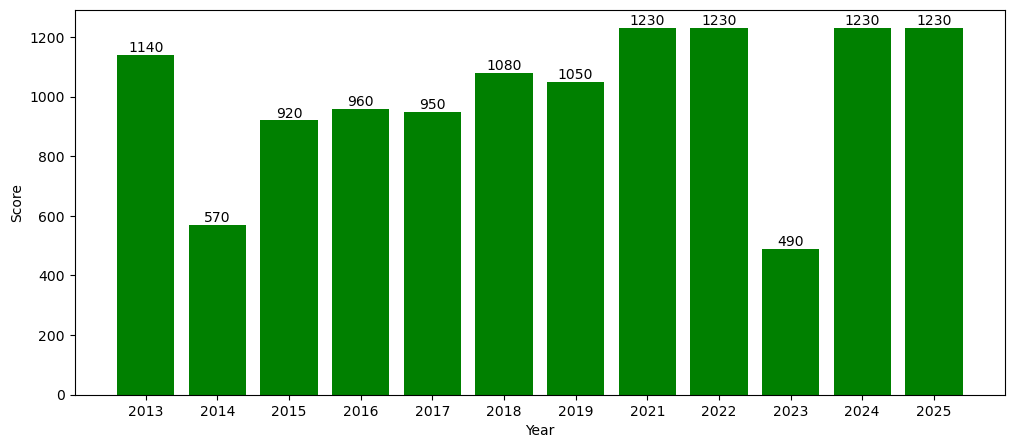

Average: 1006.667
Avg. Differential: 0.645


2020's Average: 1045.0
2020's Avg. Differential: 0.653


In [6]:
bracket_check(df, years)

In [7]:
df[df["Sim_Wins"] > 3].sort_values(["Year", "Sim_Wins"], ascending=False)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
1,2025,Houston,1,Midwest,4.406050,5,6,1
3,2025,Auburn,1,South,2.856173,4,5,1
0,2025,Florida,1,West,2.736881,6,4,2
2,2025,Duke,1,East,3.755674,4,4,0
68,2024,Connecticut,1,East,3.529783,6,6,0
76,2024,Houston,1,South,3.417637,2,5,3
69,2024,Purdue,1,Midwest,2.872652,5,4,1
77,2024,North Carolina,1,West,2.378496,2,4,2
144,2023,UCLA,2,West,3.819961,2,6,4
145,2023,Alabama,1,South,2.792867,2,5,3


In [8]:
df[(df["Seed"] > 9) & (df["Sim_Wins"] > 0)]

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
103,2024,New Mexico,11,West,1.175857,0,1,1
211,2022,Miami FL,10,Midwest,0.864904,3,1,2
217,2022,Michigan,11,South,0.704030,2,1,1
231,2022,Notre Dame,11,West,0.724376,1,1,0
365,2019,Florida,10,West,1.064928,1,1,0
422,2018,Syracuse,11,Midwest,0.772834,2,1,1
437,2018,Butler,10,East,1.198468,1,1,0
483,2017,Xavier,11,West,0.761194,3,1,2
503,2017,Wichita St.,10,South,1.000709,1,1,0
505,2017,Middle Tennessee,12,South,0.611685,1,1,0


In [9]:
len(df[(df["Seed"] > 9) & (df["Sim_Wins"] > 0) & (df["Wins"] > 0)]) / len(df[(df["Seed"] > 9) & (df["Sim_Wins"] > 0)])

0.6666666666666666

In [10]:
len(df[(df["Sim_Wins"] > 0) & (df["Wins"] > 0)]) / len(df[(df["Sim_Wins"] > 0)])

0.7447916666666666

In [11]:
len(df[(df["Sim_Wins"] > 1) & (df["Wins"] > 1)]) / len(df[(df["Sim_Wins"] > 1)])

0.640625

In [12]:
len(df[(df["Sim_Wins"] > 2) & (df["Wins"] > 2)]) / len(df[(df["Sim_Wins"] > 2)])

0.4895833333333333

In [13]:
len(df[(df["Sim_Wins"] > 3) & (df["Wins"] > 3)]) / len(df[(df["Sim_Wins"] > 3)])

0.4791666666666667

In [16]:
len(df[(df["Sim_Wins"] > 4) & (df["Wins"] > 4)]) / len(df[(df["Sim_Wins"] > 4)])

0.375

In [17]:
len(df[(df["Sim_Wins"] > 5) & (df["Wins"] > 5)]) / len(df[(df["Sim_Wins"] > 5)])

0.4166666666666667

In [18]:
len(df[(df["Wins"] == df["Sim_Wins"])]) / len(df)

0.5723039215686274

In [24]:
len(df[(df["Wins"] == df["Sim_Wins"]) & ((df["Wins"] > 0) | (df["Sim_Wins"] > 0))]) / len(df)

0.16299019607843138

In [40]:
len(df[(df["Year"] == 2024) & (df["Sim_Wins"] >= 2) & (df["Wins"] >= 2)]) / len(df[(df["Year"] == 2019) & (df["Wins"] >= 2)])

0.8125

In [47]:
df[(df["Seed"] > 9)].sort_values("Proj_Wins", ascending=False).head(20)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
559,2016,Gonzaga,11,Midwest,1.205500,2,2,0
437,2018,Butler,10,East,1.198468,1,1,0
763,2013,Oregon,12,Midwest,1.192221,2,2,0
103,2024,New Mexico,11,West,1.175857,0,1,1
257,2022,Virginia Tech,11,East,1.110960,0,0,0
719,2014,Iowa,11,Midwest,1.100182,0,1,1
572,2016,Wichita St.,11,South,1.064977,1,1,0
365,2019,Florida,10,West,1.064928,1,1,0
791,2013,Cincinnati,10,Midwest,1.063166,0,1,1
773,2013,Mississippi,12,West,1.059280,1,0,1


In [48]:
df[(df["Year"] == 2013) & (df["Region"] == "Midwest")]

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
748,2013,Louisville,1,Midwest,4.164746,6,6,0
754,2013,Duke,2,Midwest,2.090509,3,3,0
760,2013,Michigan St.,3,Midwest,1.625094,2,2,0
763,2013,Oregon,12,Midwest,1.192221,2,2,0
769,2013,Saint Louis,4,Midwest,1.164667,1,1,0
770,2013,Memphis,6,Midwest,1.287794,1,1,0
771,2013,Colorado St.,8,Midwest,0.908006,1,1,0
779,2013,Creighton,7,Midwest,0.895795,1,0,1
791,2013,Cincinnati,10,Midwest,1.063166,0,1,1
782,2013,Oklahoma St.,5,Midwest,0.994255,0,0,0


In [8]:
df[(df["Seed"] > 11)].sort_values("Proj_Wins", ascending=False).head(20)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff
763,2013,Oregon,12,Midwest,1.192221,2,2,0
773,2013,Mississippi,12,West,1.059280,1,0,1
355,2019,Oregon,12,South,1.054813,2,0,2
574,2016,Little Rock,12,Midwest,0.787006,1,0,1
266,2022,UAB,12,South,0.682736,0,0,0
263,2022,Chattanooga,13,South,0.613671,0,0,0
505,2017,Middle Tennessee,12,South,0.611685,1,1,0
188,2023,Oral Roberts,12,East,0.611469,0,0,0
740,2014,Xavier,12,Midwest,0.610692,0,1,1
403,2019,New Mexico St.,12,Midwest,0.607925,0,0,0


In [31]:
ranks = []

for year in years:
    
    data = df[df["Year"] == year].copy()
    data.loc[:, "Wins_Rank_Agg"] = data["Proj_Wins"].rank(ascending=False).astype(int)
    
    ranks.append(data)
    
new = pd.concat(ranks)

In [46]:
new[new["Year"] == 2021].sort_values("Wins_Rank_Agg").head(25)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg,Proj_Wins_Agg
272,2021,Baylor,1,South,3.944481,6,6,0,1,3.944481
280,2021,Alabama,2,East,3.921629,2,5,3,2,3.921629
273,2021,Gonzaga,1,West,3.532798,5,4,1,3,3.532798
274,2021,Houston,2,Midwest,2.656820,4,4,0,4,2.656820
288,2021,Illinois,1,Midwest,2.560361,1,3,2,5,2.560361
276,2021,Michigan,1,East,2.183328,3,3,0,6,2.183328
289,2021,Iowa,2,West,2.032246,1,3,2,7,2.032246
290,2021,Colorado,5,East,1.806325,1,2,1,8,1.806325
277,2021,USC,6,West,1.654628,3,2,1,9,1.654628
304,2021,Ohio St.,2,South,1.640417,0,3,3,10,1.640417


In [33]:
new[(new["Seed"] == 1)].sort_values("Wins_Rank_Agg").tail(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg
477,2017,Gonzaga,1,West,2.083037,5,4,1,6
276,2021,Michigan,1,East,2.183328,3,3,0,6
612,2015,Duke,1,South,2.368410,6,4,2,6
425,2018,Xavier,1,West,2.347332,1,3,2,6
550,2016,Virginia,1,Midwest,2.359092,3,3,0,6
706,2014,Wichita St.,1,Midwest,2.052330,1,3,2,8
212,2022,Arizona,1,South,2.207040,2,2,0,9
549,2016,Oregon,1,West,1.589371,3,2,1,13
764,2013,Gonzaga,1,West,1.630543,1,2,1,13
345,2019,Gonzaga,1,West,1.604234,3,2,1,14


In [34]:
new[(new["Seed"] == 16)].sort_values("Wins_Rank_Agg").head(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg
653,2015,Coastal Carolina,16,West,0.109903,0,0,0,57
470,2018,Penn,16,Midwest,0.149791,0,0,0,58
246,2022,Georgia St.,16,West,0.101691,0,0,0,60
125,2024,Longwood,16,South,0.110988,0,0,0,61
537,2017,North Carolina Central,16,Midwest,0.094355,0,0,0,61
531,2017,Texas Southern,16,South,0.081315,0,0,0,62
733,2014,Coastal Carolina,16,East,0.059237,0,0,0,62
333,2021,Hartford,16,South,0.073775,0,0,0,62
119,2024,Stetson,16,East,0.101616,0,0,0,62
264,2022,Bryant,16,South,0.090954,0,0,0,63


In [35]:
new[(new["Wins"] > 0)].sort_values("Wins_Rank_Agg").tail(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg
575,2016,Middle Tennessee,15,Midwest,0.185714,1,0,1,58
762,2013,Florida Gulf Coast,15,South,0.131279,2,0,2,58
435,2018,Marshall,13,East,0.137689,1,0,1,60
151,2023,Princeton,15,South,0.150045,2,0,2,61
285,2021,Oral Roberts,15,South,0.086795,2,0,2,61
641,2015,UAB,14,South,0.096824,1,0,1,61
774,2013,Harvard,14,West,0.074153,1,0,1,62
210,2022,Saint Peter's,15,East,0.092896,3,0,3,62
438,2018,UMBC,16,South,0.089389,1,0,1,63
162,2023,Fairleigh Dickinson,16,East,0.031618,1,0,1,67


In [36]:
new[(new["Seed"] > 13) & (new["Wins"] > 0)].sort_values("Wins_Rank_Agg").head(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg
571,2016,Stephen F. Austin,14,East,0.329299,1,0,1,48
639,2015,Georgia St.,14,West,0.225067,1,0,1,50
301,2021,Abilene Christian,14,East,0.203763,1,0,1,53
711,2014,Mercer,14,Midwest,0.213697,1,0,1,55
97,2024,Oakland,14,South,0.227482,1,0,1,55
762,2013,Florida Gulf Coast,15,South,0.131279,2,0,2,58
575,2016,Middle Tennessee,15,Midwest,0.185714,1,0,1,58
641,2015,UAB,14,South,0.096824,1,0,1,61
285,2021,Oral Roberts,15,South,0.086795,2,0,2,61
151,2023,Princeton,15,South,0.150045,2,0,2,61


In [41]:
new["Proj_Wins_Agg"] = new["Proj_Wins"]

new_df = new[["Year", "Team", "Proj_Wins_Agg", "Wins_Rank_Agg"]]

new_df

,Year,Team,Proj_Wins_Agg,Wins_Rank_Agg
748,2013,Louisville,4.164746,1
749,2013,Michigan,1.309478,17
750,2013,Syracuse,1.691496,9
751,2013,Wichita St.,0.995728,30
752,2013,Ohio St.,2.243558,3
...,...,...,...,...
63,2025,Wofford,0.083471,62
64,2025,Utah St.,0.500917,47
65,2025,Troy,0.115276,58
66,2025,Texas,0.559220,42


In [42]:
new_df.to_csv("../../data/aggressive_wins.csv")

In [48]:
new[(new["Year"] == 2025) & ((new["Team"] == "Florida") | (new["Team"] == "Houston"))]

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg,Proj_Wins_Agg
0,2025,Florida,1,West,2.736881,6,4,2,4,2.736881
1,2025,Houston,1,Midwest,4.406050,5,6,1,1,4.406050


In [61]:
new[(new["Seed"] == 1)].sort_values("Proj_Wins", ascending=False).tail(10)

,Year,Team,Seed,Region,Proj_Wins,Wins,Sim_Wins,Diff,Wins_Rank_Agg,Proj_Wins_Agg
152,2023,Kansas,1,West,2.307443,1,3,2,5,2.307443
212,2022,Arizona,1,South,2.207040,2,2,0,9,2.207040
276,2021,Michigan,1,East,2.183328,3,3,0,6,2.183328
480,2017,Kansas,1,Midwest,2.147813,3,4,1,5,2.147813
477,2017,Gonzaga,1,West,2.083037,5,4,1,6,2.083037
706,2014,Wichita St.,1,Midwest,2.052330,1,3,2,8,2.052330
756,2013,Indiana,1,East,1.872038,2,3,1,6,1.872038
764,2013,Gonzaga,1,West,1.630543,1,2,1,13,1.630543
345,2019,Gonzaga,1,West,1.604234,3,2,1,14,1.604234
549,2016,Oregon,1,West,1.589371,3,2,1,13,1.589371
